# Import Necessary Libraries

In [1]:
import gym
import torch
import numpy as np
from ipynb.fs.full.PongPPO import Agent
from utils import plot_learning_curve

# Preprocess Pong Environment for faster training

In [2]:
# Preprocess image(Code from class)
def prepro(image):
    image = image[35:195]  # crop
    image = image[::2, ::2, 0]  # downsample by factor of 2
    image[image == 144] = 0  # erase background (background type 1)
    image[image == 109] = 0  # erase background (background type 2)
    image[image != 0] = 1  # everything else (paddles, ball) just set to 1
    return np.reshape(image, (1, 80, 80))


# Set Up Pong Environment

If it works on Pong environment, then it will likely work on the Breakout Environment as well (with a few tweaks)

... loading models ...
... saving models ...
episode 0 score -21.0 avg score -21.0 time_steps 874 learning_steps 43
episode 1 score -21.0 avg score -21.0 time_steps 1658 learning_steps 82
episode 2 score -21.0 avg score -21.0 time_steps 2442 learning_steps 122
episode 3 score -21.0 avg score -21.0 time_steps 3226 learning_steps 161
... saving models ...
episode 4 score -20.0 avg score -20.8 time_steps 4065 learning_steps 203
... saving models ...
episode 5 score -20.0 avg score -20.7 time_steps 4904 learning_steps 245
... saving models ...
episode 6 score -20.0 avg score -20.6 time_steps 5887 learning_steps 294
episode 7 score -21.0 avg score -20.6 time_steps 6671 learning_steps 333
... saving models ...
episode 8 score -20.0 avg score -20.6 time_steps 7510 learning_steps 375
episode 9 score -21.0 avg score -20.6 time_steps 8323 learning_steps 416
episode 10 score -21.0 avg score -20.6 time_steps 9107 learning_steps 455
... saving models ...
episode 11 score -18.0 avg score -20.4 time_

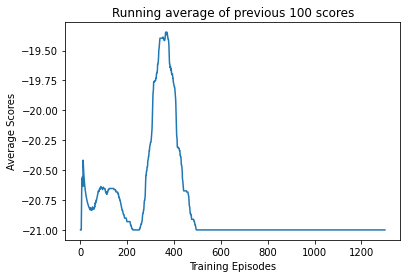

In [5]:
if __name__ == '__main__':
    env = gym.make('ALE/Pong-v5')
    N = 20
    batch_size = 5
    n_epochs = 4
    alpha = 0.0003

    raw_image = env.reset()
    preprocessed_image = prepro(raw_image) #(1, 80, 80)

    flattened = preprocessed_image.flatten()
    agent = Agent(num_actions = env.action_space.n, batch_size = 5, alpha = 0.0003, num_epochs = 4, input_dims = flattened.shape)
    n_games = 1300

    figure_file = 'plots/Pong.png'

    best_score = env.reward_range[0]
    score_history = []

    learn_iters = 0
    avg_score = 0
    n_steps = 0

    # Load model
    agent.load_models()
    
    for i in range(n_games): # 103 min 8.8 sec for 300 iterations
        observation = env.reset()
        done = False
        score = 0
        while not done:
            observation = prepro(observation) # need to preprocess each time
            action, prob, val = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            n_steps += 1
            score += reward
            agent.remember(observation, action, prob, val, reward, done)
            if n_steps % N == 0: # if true, it's time to perform learning function
                agent.learn()
                learn_iters += 1
            observation = observation_
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score: # if best score found
            best_score = avg_score
            agent.save_models()

        print('episode', i, 'score %.1f' % score, 'avg score %.1f' % avg_score,
                'time_steps', n_steps, 'learning_steps', learn_iters)
    x = [i+1 for i in range(len(score_history))]
    plot_learning_curve(x, score_history, figure_file, "Training Episodes", "Average Scores")

# Test Trained Model

In [ ]:
    env = gym.make('ALE/Pong-v5')
    N = 20
    batch_size = 5
    n_epochs = 4
    alpha = 0.0003

    raw_image = env.reset()
    preprocessed_image = prepro(raw_image)  # (1, 80, 80)

    flattened = preprocessed_image.flatten()
    agent = Agent(num_actions=env.action_space.n, batch_size=5,
                alpha=0.0003, num_epochs=4, input_dims=flattened.shape)
    n_games = 50

    figure_file = 'plots/Pong.png'

    best_score = env.reward_range[0]
    score_history = []

    learn_iters = 0
    avg_score = 0
    n_steps = 0
    while not done:
        env.render()
        action, prob, val = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        n_steps += 1
        score += reward
        agent.remember(observation, action, prob, val, reward, done)
        if n_steps % N == 0:  # if true, it's time to perform learning function
            agent.learn()
            learn_iters += 1
        observation = observation_
    print(score)
    env.close()
